In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# warning
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')

In [100]:
from IPython.display import Markdown, display
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
    
df = pd.read_csv('spam_ham_dataset.csv')

In [101]:
# Display the first rows
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [102]:
print(f'The dataset as a total of {df.shape[0]} E-Mails, which are categorized is ham and spam')

The dataset as a total of 5171 E-Mails, which are categorized is ham and spam


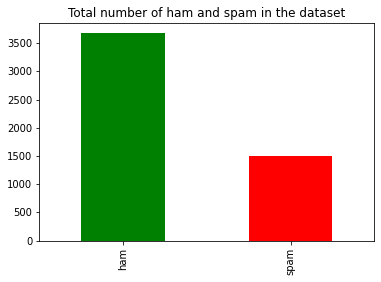

In [103]:
df['label'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

The raw E-Mails have a lot of characters beside of the ones of the alphabet, which might provoke issues later. Therefore, the E-Mails will be cleaned. Remember that it is a basic model, which won't take count of punctuation.

In [128]:

# from nltk.tokenize import RegexpTokenizer

# def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
#     # Clean a string with RegexpTokenizer
#     string = string.lower()
#     tokens = reg.tokenize(string)
#     return " ".join(tokens)

# print('Before cleaning:')
# df['text'][0]
# ##
# print('After cleaning:')
# clean_str(df['text'][0])


In [105]:
import re
# text processing libs
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /home/amdj3d/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
print('Before cleaning:')
df['text'][0]

Before cleaning:


"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [107]:
## delete

#stop words
stop_words = stopwords.words('english')
#root word
stemmer = SnowballStemmer('english')
# text regex
text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|subject:\S+|nbsp"


###########"
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
df.text = df.text.apply(lambda x: preprocess(x))
# data.text = prepeocess(data.text)
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,subject: enron methanol ; meter # : 988291 fol...,0
1,2349,ham,"subject: hpl nom january 9 , 2001 ( see attach...",0
2,3624,ham,"subject: neon retreat ho ho ho , ' around wond...",0
3,4685,spam,"subject: photoshop , windows , office . cheap ...",1
4,2030,ham,subject: : indian springs deal book teco pvr r...,0


In [108]:
print('After cleaning:')
clean_str(df['text'][0])

After cleaning:


'subject enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [109]:
# Create a new column with the cleaned messages
df['text_clean'] = df['text'].apply(lambda string: clean_str(string))

# Display the result
df.head()

,Unnamed: 0,label,text,label_num,text_clean
0,605,ham,subject: enron methanol ; meter # : 988291 fol...,0,subject enron methanol meter follow note gave ...
1,2349,ham,"subject: hpl nom january 9 , 2001 ( see attach...",0,subject hpl nom january see attached file hpln...
2,3624,ham,"subject: neon retreat ho ho ho , ' around wond...",0,subject neon retreat ho ho ho around wonderful...
3,4685,spam,"subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,2030,ham,subject: : indian springs deal book teco pvr r...,0,subject indian springs deal book teco pvr reve...


In [115]:
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
df['label'].replace({"spam":1,"ham":0})


X = cv.fit_transform(df.text_clean)

# Get the categories
y = df.label
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label, Length: 5171, dtype: int64


In [116]:
# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [117]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['label'])
df['label']=le.transform(df['label'])

In [118]:
print('x_train:', X_train)
print('X_test', X_test)
print('y_train', y_train)
print('y_test', y_test)

x_train:   (0, 38736)	1
  (0, 26237)	3
  (0, 23153)	1
  (0, 17628)	1
  (0, 24041)	1
  (0, 27831)	1
  (0, 25411)	1
  (0, 27968)	1
  (0, 13995)	1
  (0, 9166)	1
  (0, 40588)	1
  (0, 30450)	1
  (0, 27014)	1
  (0, 40015)	1
  (0, 15343)	1
  (0, 20143)	1
  (0, 36670)	1
  (0, 40791)	1
  (0, 9229)	1
  (0, 35853)	1
  (1, 38736)	1
  (1, 13966)	1
  (1, 26244)	2
  (1, 16949)	3
  (1, 16095)	2
  :	:
  (4135, 25700)	2
  (4135, 28790)	1
  (4135, 700)	1
  (4135, 40020)	1
  (4135, 42373)	1
  (4135, 39590)	1
  (4135, 31315)	2
  (4135, 19659)	3
  (4135, 13162)	7
  (4135, 39069)	1
  (4135, 37391)	1
  (4135, 12341)	1
  (4135, 33966)	1
  (4135, 17946)	1
  (4135, 32161)	1
  (4135, 43613)	1
  (4135, 42958)	1
  (4135, 9408)	2
  (4135, 40588)	3
  (4135, 438)	2
  (4135, 41987)	1
  (4135, 14419)	1
  (4135, 34562)	1
  (4135, 14422)	1
  (4135, 29952)	1
X_test   (0, 38736)	1
  (0, 31243)	1
  (0, 2810)	1
  (0, 39439)	1
  (0, 36429)	1
  (0, 32164)	1
  (0, 40020)	1
  (0, 29734)	1
  (0, 34549)	1
  (0, 16944)	1
  (0, 5388)

In [119]:
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [120]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [127]:
from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


# The ratio of the sum of true positives and true negatives out of all the predictions.
# Used accuracy metric is: Accuracy Score = (TP+TN)/ (TP+FN+TN+FP)


Accuracy: 97.20%


### Accuracy: 97.20%
---


In [122]:
models = {
    "XGBoost": {"model":XGBClassifier(eval_metric='mlogloss'), "perf":0},
}

In [123]:
for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

XGBoost              trained in 1.22 sec


In [124]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test, y_test),model["perf"]])

In [125]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy w/o scaling', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy w/o scaling', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy w/o scaling,Training time (sec)
0,XGBoost,0.971981,1.22
